In [198]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [199]:
df=pd.read_csv("Training_sets.csv")
print(df.describe())

          Fatigue    Soreness      Desire  Irritability  SleepHours  \
count  127.000000  127.000000  127.000000    127.000000  127.000000   
mean     3.582677    3.448819    4.755906      4.062992    8.200787   
std      0.946514    1.186623    1.013532      0.651592    1.122037   
min      1.000000    1.000000    2.000000      1.000000    3.750000   
25%      3.000000    3.000000    4.000000      4.000000    7.750000   
50%      4.000000    4.000000    4.000000      4.000000    8.500000   
75%      4.000000    4.000000    5.000000      4.000000    8.750000   
max      6.000000    7.000000    7.000000      6.000000   11.000000   

       SleepQuality        Pain     Illness  Menstruation   Nutrition  \
count    127.000000  127.000000  127.000000    127.000000  127.000000   
mean       3.393701    0.110236    0.039370      0.118110    3.755906   
std        1.169435    0.314424    0.195244      0.324017    0.431250   
min        1.000000    0.000000    0.000000      0.000000    3.00000

In [200]:
y_val= df["Total_Distance"]
x_data=df.drop("Total_Distance",axis=1)

In [201]:
X_train, X_eval,y_train,y_eval=train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [202]:
scaler_model = MinMaxScaler()
scaler_model.fit(X_train)

X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

scaler_model.fit(X_eval)

X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

In [203]:
feat_cols=[]
for cols in df.columns[:-1]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)

In [204]:
#The estimator model
model=tf.estimator.DNNRegressor(hidden_units=[40,40,60,100,100,100,40,60,60,60,60,60,60,60,60],feature_columns=feat_cols,
                               optimizer=tf.train.ProximalAdagradOptimizer(
                                   learning_rate=0.1,
                                   l1_regularization_strength=0.001))

#the input function
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/5y/wz7x6nwj0c18pmx95nqrkjy40000gn/T/tmpe0gu1ftp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a43a8d080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [205]:
model.train(input_fn=input_func,steps=15000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/5y/wz7x6nwj0c18pmx95nqrkjy40000gn/T/tmpe0gu1ftp/model.ckpt.
INFO:tensorflow:loss = 14608640.0, step = 1
INFO:tensorflow:global_step/sec: 176.198
INFO:tensorflow:loss = 2086101.0, step = 101 (0.570 sec)
INFO:tensorflow:global_step/sec: 251.522
INFO:tensorflow:loss = 1305468.9, step = 201 (0.398 sec)
INFO:tensorflow:global_step/sec: 251.505
INFO:tensorflow:loss = 2279851.5, step = 301 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.802
INFO:tensorflow:loss = 961508.0, step = 401 (0.403 sec)
INFO:tensorflow:global_step/sec: 252.411
INFO:tensorflow:loss = 860291.1, step = 501 (0.396 sec)
INFO:tensorflow:global_step/sec: 240.48
INFO:tensorflow:loss = 1096378.6, step = 601 (0.416 sec)
INFO:tensorflow

INFO:tensorflow:loss = 339002.94, step = 8001 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.071
INFO:tensorflow:loss = 185005.22, step = 8101 (0.397 sec)
INFO:tensorflow:global_step/sec: 252.863
INFO:tensorflow:loss = 96838.76, step = 8201 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.133
INFO:tensorflow:loss = 37435.13, step = 8301 (0.398 sec)
INFO:tensorflow:global_step/sec: 244.98
INFO:tensorflow:loss = 574593.4, step = 8401 (0.408 sec)
INFO:tensorflow:global_step/sec: 265.971
INFO:tensorflow:loss = 205621.34, step = 8501 (0.376 sec)
INFO:tensorflow:global_step/sec: 246.844
INFO:tensorflow:loss = 56295.55, step = 8601 (0.405 sec)
INFO:tensorflow:global_step/sec: 236.232
INFO:tensorflow:loss = 101128.28, step = 8701 (0.423 sec)
INFO:tensorflow:Saving checkpoints for 8800 into /var/folders/5y/wz7x6nwj0c18pmx95nqrkjy40000gn/T/tmpe0gu1ftp/model.ckpt.
INFO:tensorflow:Loss for final step: 165805.8.


In [206]:
train_metrics=model.evaluate(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-05T16:39:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/5y/wz7x6nwj0c18pmx95nqrkjy40000gn/T/tmpe0gu1ftp/model.ckpt-8800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-05-16:39:11
INFO:tensorflow:Saving dict for global step 8800: average_loss = 29016.438, global_step = 8800, label/mean = 1066.8798, loss = 290164.38, prediction/mean = 1044.1819
INFO:tensorflow:Saving

In [207]:

#Now to predict values we do the following
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=x_data,shuffle = False)
preds=model.predict(input_fn=pred_input_func)

predictions=list(preds)
final_pred=[]
ok = 1
for pred in predictions:
    if(ok):
        print(type(pred["predictions"][0].item()))
        ok = 0
    final_pred.append(pred["predictions"][0].item())

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/5y/wz7x6nwj0c18pmx95nqrkjy40000gn/T/tmpe0gu1ftp/model.ckpt-8800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'float'>


In [208]:
import statistics
print(type(final_pred[0]))
final_pred
print(statistics.stdev(final_pred))
print(statistics.mean(final_pred))

<class 'float'>
729.1490593227695
2625.66806991457


In [209]:
y_val
print(statistics.stdev(y_val))
print(statistics.mean(y_val))

456.07728130649383
1054.0985314237166


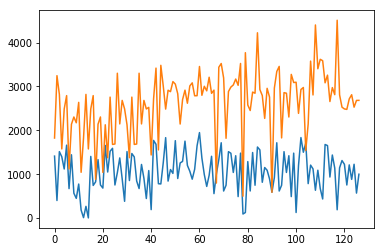

In [210]:
plt.plot(y_val)
plt.plot(final_pred)